In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [39]:
# we ddfine a function to get the entropy of a given df column
def entropy(column):
    # get the unique values of the column
    unique_values = column.unique()
    # get the total number of values in the column
    total_values = len(column)
    # initialize the entropy
    entropy = 0
    # iterate over the unique values
    for value in unique_values:
        # get the number of times the value appears in the column
        value_count = len(column[column == value])
        # calculate the probability of the value
        probability = value_count / total_values
        # add the entropy of the value to the total entropy
        entropy += -probability * np.log2(probability)
    return entropy

#  we test the function
# create a dataframe
df = pd.DataFrame({'A': [1, 1, 0, 0, 0, 0, 0, 0], 'B': [1, 1, 0, 0, 1, 1, 0, 0]})
# get the entropy of the A column
print(entropy(df['A']))
# get the entropy of the B column
print(entropy(df['B']))




0.8112781244591328
1.0


c:\github\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.



<Axes: title={'center': 'SPY Daily Returns'}, xlabel='Date'>

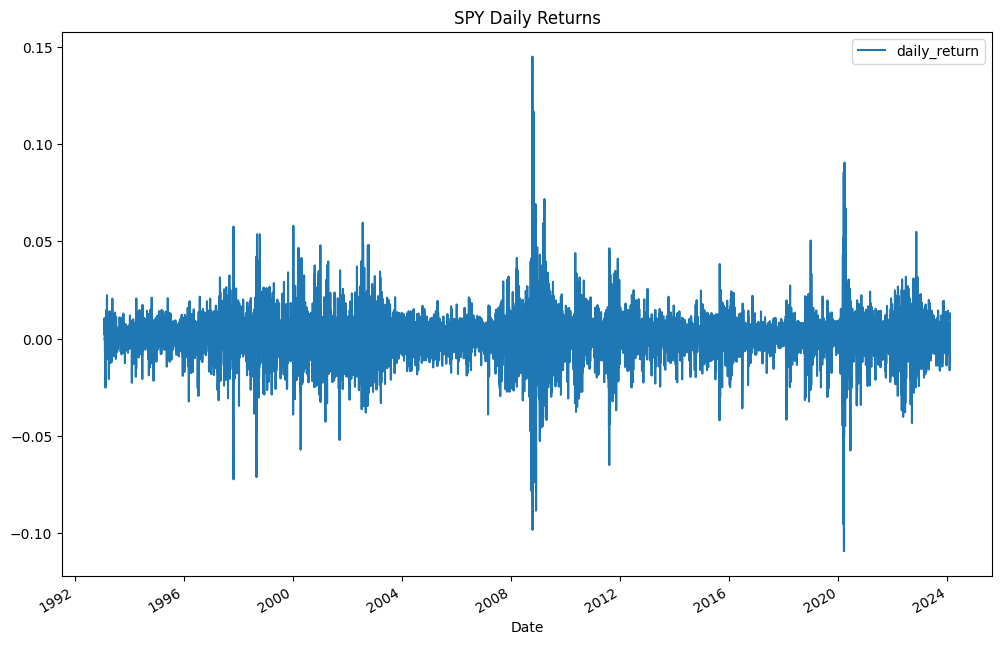

In [40]:
# we download daily price data from yahoo finance
# we use the adjusted close price

# we download the data for the following tickers
# we use the following tickers SPY

import yfinance as yf

# we download the data for the following tickers: SPY

spy = yf.Ticker("SPY")
spy_df = spy.history(period="max")
spy_df = spy_df.reset_index()
spy_df = spy_df[["Date", "Close"]]

# spy_df.head()


# we get the daily returns
spy_df["daily_return"] = spy_df["Close"].pct_change()

# we plot the daily returns
spy_df.plot(x="Date", y="daily_return", title="SPY Daily Returns", figsize=(12, 8))

In [41]:
# we download daily price data from yahoo finance
# we use the adjusted close price

# we download the data for the following tickers
# we use the following tickers SPY

import yfinance as yf

# we download the data for the following tickers: SPY

spy = yf.Ticker("SPY")
spy_df = spy.history(period="max")
spy_df = spy_df.reset_index()
spy_df = spy_df[["Date", "Close"]]

# spy_df.head()


# we get the daily returns
spy_df["spy_daily_return"] = spy_df["Close"].pct_change()
spy_df = spy_df.dropna()
spy_df['spy_daily_log_return'] = np.log(spy_df['Close'] / spy_df['Close'].shift(1))

# # we plot the daily returns
# spy_df.plot(x="Date", y="daily_log_return", title="SPY Daily Log Returns", figsize=(12, 8), alpha=0.5)
# # we overlay the daily returns in red
# spy_df.plot(x="Date", y="daily_return", title="SPY Daily Returns", figsize=(12, 8), color="red", alpha=0.5)
# plot the daily returns and the daily log returns on the same plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_return"], mode='lines', name='daily_return'))    
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_log_return"], mode='lines', name='daily_log_return'))
fig.update_layout(title="SPY Daily Returns and Log Returns", xaxis_title="Date", yaxis_title="Returns")
fig.show()



c:\github\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.



In [42]:
# we define a function to get the mutual information of two columns

def mutual_information(column1, column2):
    # get the unique values of the columns
    unique_values_column1 = column1.unique()
    unique_values_column2 = column2.unique()
    # get the total number of values in the columns
    total_values_column1 = len(column1)
    total_values_column2 = len(column2)
    # initialize the mutual information
    mutual_information = 0
    # iterate over the unique values of the first column
    for value1 in unique_values_column1:
        # get the number of times the value appears in the first column
        value1_count = len(column1[column1 == value1])
        # calculate the probability of the value
        probability_value1 = value1_count / total_values_column1
        # iterate over the unique values of the second column
        for value2 in unique_values_column2:
            # get the number of times the value appears in the second column
            value2_count = len(column2[column2 == value2])
            # calculate the probability of the value
            probability_value2 = value2_count / total_values_column2
            # get the number of times the value appears together in the two columns
            value1_value2_count = len(column1[(column1 == value1) & (column2 == value2)])
            # calculate the probability of the two values appearing together
            probability_value1_value2 = value1_value2_count / total_values_column1
            # add the mutual information of the two values to the total mutual information
            mutual_information += probability_value1_value2 * np.log2(probability_value1_value2 / (probability_value1 * probability_value2))
    return mutual_information

c:\github\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.



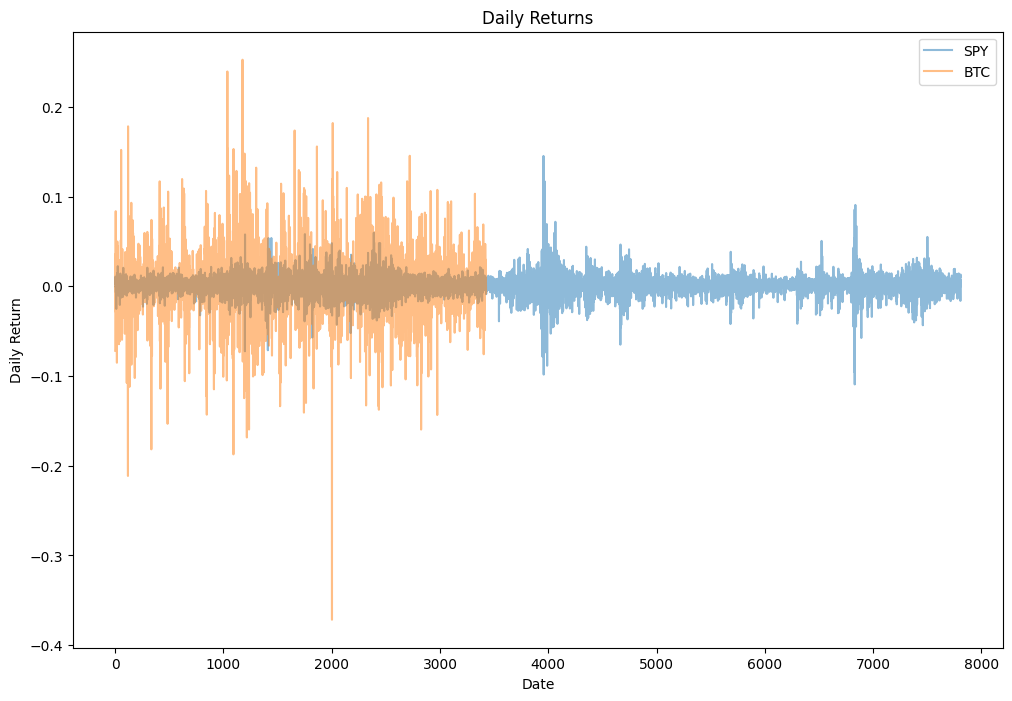

In [43]:
# we get BTC price data from yahoo finance
btc = yf.Ticker("BTC-USD")
btc_df_source = btc.history(period="max")
btc_df_source = btc_df_source.reset_index()
btc_df_source = btc_df_source[["Date", "Close"]]
# btc_df_source.head()
# we get the daily returns
btc_df_source["btc_daily_return"] = btc_df_source["Close"].pct_change()
btc_df_source['btc_daily_log_return'] = np.log(btc_df_source['Close'] / btc_df_source['Close'].shift(1))

# we plot the daily returns of BTC next to the daily returns of SPY on same plot red and blue
spy_df["spy_daily_return"].plot(figsize=(12, 8), label="SPY", alpha=0.5)
btc_df_source["btc_daily_return"].plot(figsize=(12, 8), label="BTC", alpha=0.5)
plt.legend()
# we add title and axis labels
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

In [44]:
btc_df_source.head()

,Date,Close,btc_daily_return,btc_daily_log_return
0,2014-09-17 00:00:00+00:00,457.334015,NaN,NaN
1,2014-09-18 00:00:00+00:00,424.440002,-0.071926,-0.074643
2,2014-09-19 00:00:00+00:00,394.795990,-0.069843,-0.072402
3,2014-09-20 00:00:00+00:00,408.903992,0.035735,0.035111
4,2014-09-21 00:00:00+00:00,398.821014,-0.024659,-0.024968


In [45]:
spy_df.head()

,Date,Close,spy_daily_return,spy_daily_log_return
1,1993-02-01 00:00:00-05:00,25.017355,0.007112,NaN
2,1993-02-02 00:00:00-05:00,25.070343,0.002118,0.002116
3,1993-02-03 00:00:00-05:00,25.335377,0.010572,0.010516
4,1993-02-04 00:00:00-05:00,25.441372,0.004184,0.004175
5,1993-02-05 00:00:00-05:00,25.423708,-0.000694,-0.000695


In [46]:
# we merge the two dataframes on the date column
# we make both date columns date only
spy_df["Date"] = spy_df["Date"].dt.date
btc_df_source["Date"] = btc_df_source["Date"].dt.date

merged_df = pd.merge(spy_df, btc_df_source, on="Date")
# we drop the na values
merged_df = merged_df.dropna()
# we only keep the daily returns columns
merged_df = merged_df[["Date", "spy_daily_return", "btc_daily_return"]]
merged_df.head()

,Date,spy_daily_return,btc_daily_return
1,2014-09-18,0.005330,-0.071926
2,2014-09-19,-0.000901,-0.069843
3,2014-09-22,-0.007723,0.008352
4,2014-09-23,-0.005724,0.083647
5,2014-09-24,0.007828,-0.028881


In [47]:
merged_df.tail()

,Date,spy_daily_return,btc_daily_return
2356,2024-01-29,0.007919,0.029800
2357,2024-01-30,-0.000773,-0.007754
2358,2024-01-31,-0.016317,-0.008614
2359,2024-02-01,0.013088,0.011581
2360,2024-02-02,0.010527,0.002556


In [49]:
# we round the daily returns to 4 decimal places
merged_df["spy_daily_return"] = merged_df["spy_daily_return"].round(4)
merged_df["btc_daily_return"] = merged_df["btc_daily_return"].round(4)
merged_df.head()

,Date,spy_daily_return,btc_daily_return
1,2014-09-18,0.0053,-0.0719
2,2014-09-19,-0.0009,-0.0698
3,2014-09-22,-0.0077,0.0084
4,2014-09-23,-0.0057,0.0836
5,2014-09-24,0.0078,-0.0289


In [50]:
# we check how many unique values we have in the spy daily returns column
len(merged_df["spy_daily_return"].unique())

# we check how many unique values we have in the btc daily returns column
len(merged_df["btc_daily_return"].unique())

print(len(merged_df["spy_daily_return"].unique()))  
print(len(merged_df["btc_daily_return"].unique()))

492
1062


In [51]:
# we times 100 to make the values integers
merged_df["spy_daily_return"] = (merged_df["spy_daily_return"] * 100)
merged_df["btc_daily_return"] = (merged_df["btc_daily_return"] * 100)
merged_df.head()

,Date,spy_daily_return,btc_daily_return
1,2014-09-18,0.53,-7.19
2,2014-09-19,-0.09,-6.98
3,2014-09-22,-0.77,0.84
4,2014-09-23,-0.57,8.36
5,2014-09-24,0.78,-2.89


In [53]:
# we round the daily returns to 0.5 decimal places
merged_df["spy_daily_return"] = merged_df["spy_daily_return"].round(1)
merged_df["btc_daily_return"] = merged_df["btc_daily_return"].round(1)
merged_df.head()

,Date,spy_daily_return,btc_daily_return
1,2014-09-18,0.5,-7.2
2,2014-09-19,-0.1,-7.0
3,2014-09-22,-0.8,0.8
4,2014-09-23,-0.6,8.4
5,2014-09-24,0.8,-2.9


In [54]:
# we round to the nearest 0.5
merged_df["spy_daily_return"] = (merged_df["spy_daily_return"] * 2).round() / 2 
merged_df["btc_daily_return"] = (merged_df["btc_daily_return"] * 2).round() / 2
merged_df.head()

,Date,spy_daily_return,btc_daily_return
1,2014-09-18,0.5,-7.0
2,2014-09-19,-0.0,-7.0
3,2014-09-22,-1.0,1.0
4,2014-09-23,-0.5,8.5
5,2014-09-24,1.0,-3.0


In [56]:
merged_df.tail()

,Date,spy_daily_return,btc_daily_return
2356,2024-01-29,1.0,3.0
2357,2024-01-30,-0.0,-1.0
2358,2024-01-31,-1.5,-1.0
2359,2024-02-01,1.5,1.0
2360,2024-02-02,1.0,0.5


In [57]:
print(len(merged_df["spy_daily_return"].unique()))
print(len(merged_df["btc_daily_return"].unique()))

30
73


In [55]:
# we calculate the mutual information of the two columns
print(mutual_information(merged_df["spy_daily_return"], merged_df["btc_daily_return"]))

C:\Users\jordi\AppData\Local\Temp\ipykernel_17880\3584042172.py:29: RuntimeWarning:

divide by zero encountered in log2

C:\Users\jordi\AppData\Local\Temp\ipykernel_17880\3584042172.py:29: RuntimeWarning:

invalid value encountered in scalar multiply



nan


In [60]:
# we define a function to get the pdf of a given column
def get_pdf(column):
    # get the unique values of the column
    unique_values = column.unique()
    # get the total number of values in the column
    total_values = len(column)
    # initialize the pdf
    pdf = {}
    # iterate over the unique values
    for value in unique_values:
        # get the number of times the value appears in the column
        value_count = len(column[column == value])
        # calculate the probability of the value
        probability = value_count / total_values
        # add the probability to the pdf
        pdf[value] = probability
    # we sort the pdf
    pdf = dict(sorted(pdf.items()))
    return pdf

# we test the function
# get the pdf of the spy daily returns
print(get_pdf(merged_df["spy_daily_return"]))

{-11.0: 0.000423728813559322, -9.5: 0.000423728813559322, -8.0: 0.000423728813559322, -6.0: 0.000423728813559322, -5.0: 0.000847457627118644, -4.5: 0.001694915254237288, -4.0: 0.00211864406779661, -3.5: 0.0038135593220338985, -3.0: 0.006779661016949152, -2.5: 0.010169491525423728, -2.0: 0.02076271186440678, -1.5: 0.03855932203389831, -1.0: 0.0711864406779661, -0.5: 0.14322033898305084, -0.0: 0.31652542372881354, 0.5: 0.17711864406779662, 1.0: 0.11271186440677966, 1.5: 0.05296610169491525, 2.0: 0.020338983050847456, 2.5: 0.011016949152542373, 3.0: 0.0029661016949152543, 3.5: 0.000847457627118644, 4.0: 0.000847457627118644, 4.5: 0.000423728813559322, 5.0: 0.000847457627118644, 5.5: 0.000847457627118644, 6.0: 0.000423728813559322, 6.5: 0.000423728813559322, 8.5: 0.000423728813559322, 9.0: 0.000423728813559322}


<Axes: title={'center': 'SPY Daily Returns PDF'}>

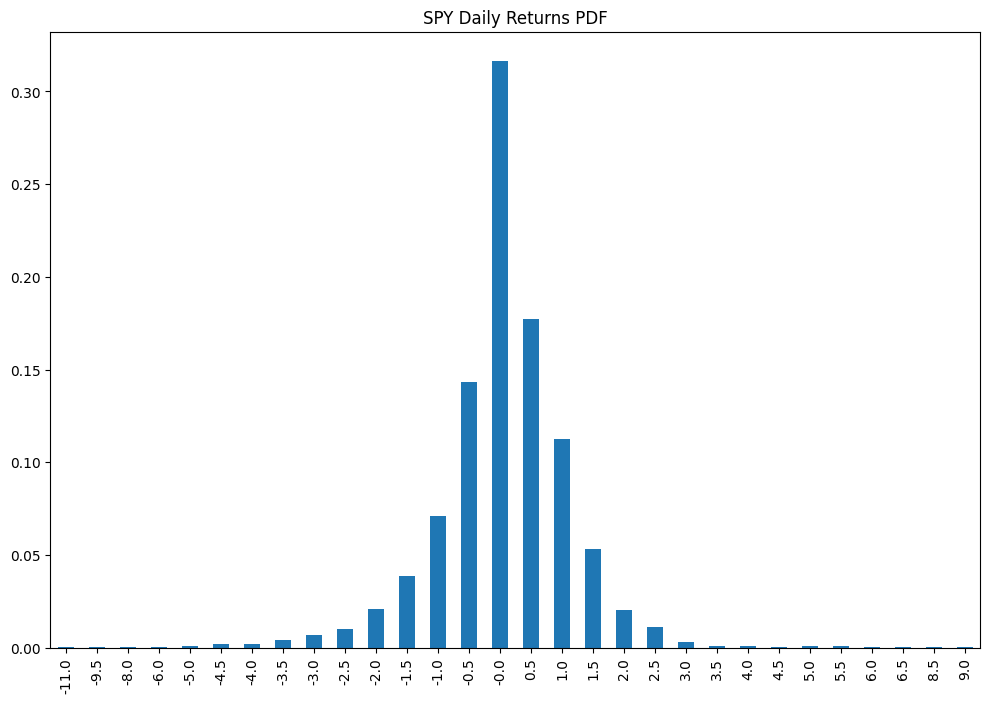

In [61]:
# we plot the pdf of the spy daily returns
spy_pdf = get_pdf(merged_df["spy_daily_return"])
spy_pdf = pd.Series(spy_pdf)
spy_pdf.plot(kind="bar", title="SPY Daily Returns PDF", figsize=(12, 8))

In [62]:
# we create an animation of the pdf of the spy daily returns
fig = px.bar(x=spy_pdf.index, y=spy_pdf.values, title="SPY Daily Returns PDF")
fig.update_layout(xaxis_title="Daily Return", yaxis_title="Probability")
fig.show()


In [66]:
# # we create an animation of the pdf of the spy daily returns. Each frame wll be a different date, and contain podf of last 100 days
# # we create a list to store the frames
# frames = []
# # we iterate over the dates
# for i in range(len(merged_df)-10, len(merged_df)):
#     # get the pdf of the spy daily returns
#     spy_pdf = get_pdf(merged_df["spy_daily_return"].iloc[i-100:i])
#     # create a frame dictionary
#     frame = {
#         'data': [{'type': 'bar', 'x': spy_pdf.keys(), 'y': spy_pdf.values()}],
#         'layout': {'title': 'SPY Daily Returns PDF'}
#     }
#     # add the frame to the list
# #     frames.append(frame)
# # we create the animation
# fig = go.Figure(frames=frames)
# fig.show()
figures = []
# we iterate over the dates
for i in range(len(merged_df)-10, len(merged_df)):
    # get the pdf of the spy daily returns
    spy_pdf = get_pdf(merged_df["spy_daily_return"].iloc[i-100:i])
    # create a figure
    fig = px.bar(x=spy_pdf.keys(), y=spy_pdf.values(), title="SPY Daily Returns PDF")
    # add the figure to the list
    figures.append(fig)
# we create the animation
fig = go.Figure(frames=figures)
fig.update_layout(title="SPY Daily Returns PDF")
fig.show()


ValueError: 
    Invalid value of type 'builtins.dict_keys' received for the 'x' property of scatter
        Received value: dict_keys([-1.5, -1.0, -0.5, -0.0, 0.5, 1.0, 1.5, 2.0])

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series